# 1. Clasificación de diabetes con LinearRegression

Este notebook muestra cómo entrenar y evaluar un modelo de regresión lineal sobre el dataset de diabetes usando bibliotecas de Python.

## 2. Importar bibliotecas necesarias

Importamos pandas, numpy y el modelo LinearRegression de scikit-learn.

In [105]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## 5. Función para cargar el dataset

Esta función lee un archivo CSV y devuelve los datos normalizados y las etiquetas.

In [106]:
def cargar_dataset(nombre_archivo):
    """
    Carga un dataset CSV, aplica normalización Min-Max, divide en entrenamiento y prueba (80/20)
    y devuelve los datos normalizados y las etiquetas.
    """
    datos = pd.read_csv(nombre_archivo)
    x = np.array(datos.iloc[:, :-1])  # Todas las columnas excepto la última: features
    y = np.array(datos.iloc[:, -1])  # Última columna: etiquetas (Outcome)
    
    # Aplicar normalización Min-Max
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)
    
    x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=42)
    return x_entrenamiento, x_prueba, y_entrenamiento, y_prueba

## 6. Cargar los datos de entrenamiento y prueba

Usamos la función definida para cargar los datos.

In [107]:
# Cargar los datos de entrenamiento y prueba
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = cargar_dataset("../../datasets/pima_indian_diabetes_dataset/full_dataset.csv")

## 7. Crear y entrenar el modelo LinearRegression

Entrenamos el modelo y mostramos los coeficientes.

In [108]:
# Crear y entrenar el modelo LinearRegression
modelo = LinearRegression()
modelo.fit(x_entrenamiento, y_entrenamiento)

# Mostrar coeficientes del modelo con nombres de columnas
columnas = pd.read_csv("../../datasets/pima_indian_diabetes_dataset/full_dataset.csv").columns[:-1]  # Excluir la columna de etiquetas
print("Coeficientes del modelo (asociados a cada columna):")
for nombre_columna, coef in zip(columnas, modelo.coef_):
    print(f"{nombre_columna}: {coef:.6f}")

Coeficientes del modelo (asociados a cada columna):
Pregnancies: 0.177959
Glucose: 1.121072
Blood Pressure: -0.278286
Skin Thickness: 0.052677
Insulin: -0.235311
BMI: 1.009093
Diabetes Pedigree Function: 0.260577
Age: 0.387616


## 8. Resultados finales

Mostramos el resumen de los resultados.

In [109]:
# Mostrar resultados finales
# Predecir valores para el conjunto de prueba
y_pred = modelo.predict(x_prueba)
y_pred_clasificado = np.round(y_pred)  # Clasificar las predicciones (0 o 1)

# Calcular precisión
accuracy = accuracy_score(y_prueba, y_pred_clasificado)
print("-------------------------------")
print("Resultados")
print("-------------------------------")
print("Muestras de entrenamiento: ", len(x_entrenamiento))
print("Muestras de prueba: ", len(x_prueba))
print("Precisión en prueba: ", round(accuracy * 100, 2), "%")

-------------------------------
Resultados
-------------------------------
Muestras de entrenamiento:  614
Muestras de prueba:  154
Precisión en prueba:  75.97 %


## 9. ¿Cómo funciona el modelo?

El modelo de regresión lineal genera un valor continuo como salida. Para clasificar los resultados en dos categorías (0 o 1), se utiliza un umbral de decisión. En este caso, las predicciones continuas se redondean al entero más cercano (`np.round(y_pred)`), donde valores menores a 0.5 se clasifican como 0 y valores mayores o iguales a 0.5 se clasifican como 1.

El modelo utiliza el siguiente modelo matemático para predecir el resultado:

$$
y = \beta_0 + \beta_1 \cdot \text{Pregnancies} + \beta_2 \cdot \text{Glucose} + 
\beta_3 \cdot \text{Blood Pressure} + \beta_4 \cdot \text{Skin Thickness} + 
\beta_5 \cdot \text{Insulin} + \beta_6 \cdot \text{BMI} + 
\beta_7 \cdot \text{Diabetes Pedigree Function} + \beta_8 \cdot \text{Age}
$$

Donde los coeficientes ($\beta$) del modelo son los siguientes:

- Pregnancies: $0.177959$
- Glucose: $1.121072$
- Blood Pressure: $-0.278286$
- Skin Thickness: $0.052677$
- Insulin: $-0.235311$
- BMI: $1.009093$
- Diabetes Pedigree Function: $0.260577$
- Age: $0.387616$

## 10. ¿Cómo se estiman los valores $\beta$?

En regresión lineal, los valores $\beta$ (coeficientes) se estiman utilizando el método de mínimos cuadrados ordinarios (OLS, por sus siglas en inglés). Este método minimiza la suma de los errores al cuadrado entre los valores predichos ($\hat{y}$) y los valores reales ($y$). La ecuación para calcular los coeficientes es:

$$
\beta = (X^T X)^{-1} X^T y
$$

Donde:
- $X$ es la matriz de características (con una columna adicional de unos para el término independiente $\beta_0$).
- $y$ es el vector de valores reales.
- $\beta$ es el vector de coeficientes estimados.

Este cálculo asegura que la línea ajustada minimice la distancia cuadrática entre los puntos reales y la línea predicha.

## 11. Visualización de predicciones vs valores reales

En esta sección, se realiza una visualización comparativa entre los valores predichos por el modelo (`y_pred_sorted`) y los valores reales de la variable objetivo (`y_prueba_sorted`) en el conjunto de prueba. Ambos conjuntos están ordenados por el valor real para facilitar la interpretación.

El gráfico incluye:
- Los valores predichos (`y_pred_sorted`) en azul.
- Los valores reales (`y_prueba_sorted`) en rojo.
- Una línea horizontal verde que representa el umbral de decisión (0.5) utilizado para clasificar los resultados.

Esta visualización permite observar gráficamente el desempeño del modelo al clasificar los casos de diabetes y qué tan cerca están las predicciones de los valores reales.

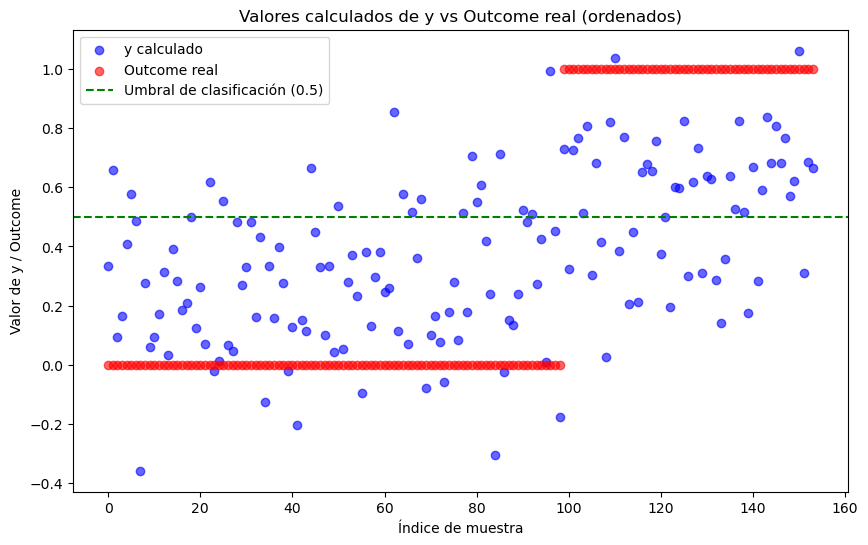

In [111]:
# Ordenar el test dataset por el outcome (0 primero, 1 después)
import pandas as pd

# Crear un DataFrame temporal para ordenar
test_data = pd.DataFrame({
    "y_pred": y_pred,
    "y_prueba": y_prueba
})

# Ordenar por la columna 'y_prueba'
test_data_sorted = test_data.sort_values(by="y_prueba").reset_index(drop=True)

# Actualizar los valores ordenados
y_pred_sorted = test_data_sorted["y_pred"].values
y_prueba_sorted = test_data_sorted["y_prueba"].values

# Graficar los valores calculados de y junto con el outcome real (ordenados)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred_sorted)), y_pred_sorted, label="y calculado", color="blue", alpha=0.6)
plt.scatter(range(len(y_prueba_sorted)), y_prueba_sorted, label="Outcome real", color="red", alpha=0.6)
plt.axhline(0.5, color="green", linestyle="--", label="Umbral de clasificación (0.5)")
plt.title("Valores calculados de y vs Outcome real (ordenados)")
plt.xlabel("Índice de muestra")
plt.ylabel("Valor de y / Outcome")
plt.legend()
plt.show()